## Setting Directory

In [1]:
import os
os.chdir('C:\\Users\\Amit\\Documents\\PythonData1200')
os.getcwd()

'C:\\Users\\Amit\\Documents\\PythonData1200'

## Importing Dependencies 

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier as dc
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

import seaborn as sns
import matplotlib.pyplot as plt

df_amit = pd.read_csv('diabetes.csv')

In [3]:
df_amit.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN


In [4]:
df_amit['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Separation of Data & Labels

In [5]:
X = df_amit.drop(['Outcome','Unnamed: 9','Unnamed: 10'], axis =1)
y = df_amit['Outcome']

## Training & Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, stratify = y, random_state = 1 )

## Standardize the Data

In [7]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Hyperparameters

In [9]:
param_grid = [
{'penalty': ['l1','l2','elasticnet','none'],
 'C': np.logspace(-4,4,20),
 'solver' : ['lbfgs', 'newton-cg', 'liblinear', 'sag','saga'],
 'max_iter':[100,1000,1500,5000]
  }
            ]

clf = GridSearchCV(model,param_grid, cv =5, verbose = True, n_jobs=-1)


In [10]:
best_clf = clf.fit(X_train, y_train)
prediction_test = best_clf.predict(X_test)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\Amit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Amit\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Amit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Amit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
Valu

In [11]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

## Accuracy of Model with Hyperparameter

In [12]:
score = accuracy_score(y_test, prediction_test)
print(score)

0.767479674796748


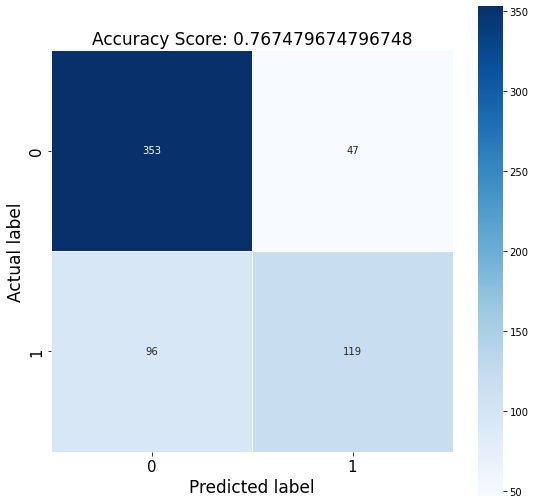

In [13]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

## Precision 

In [14]:
precision_test = precision_score(y_test,prediction_test)
precision_test

0.7168674698795181

## Recall

In [15]:
recall_test = recall_score(y_test,prediction_test)
recall_test

0.5534883720930233

## F1 Score

In [16]:
f1score_test = f1_score(y_test,prediction_test)
f1score_test

0.6246719160104988

## Model Predictions and Accuracy on Training sets

In [17]:
model_predictions = model.predict(X_train)
model_accuracy = accuracy_score(model_predictions,y_train)
model_accuracy


0.7777777777777778

## Actual Predictions and Accuracy on Test sets

In [18]:
actual_predictions = model.predict(X_test[0:100])
actual_predictions
actual_accuracy = accuracy_score(actual_predictions,y_test[0:100])
actual_accuracy

0.77

## Making a Predictive System

In [19]:
#converting into a numpy array
input_data=(6,148,72,35,0,33.6,0.627,50)
i_d_as_nparray = np.asarray(input_data)
#reshape the numpy array as we are predicting for one instance
input_data_reshaped = i_d_as_nparray.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
if (prediction == 1):
 print('Diabetic')
else:
 print('Non-Diabetic')


Diabetic
